# Final Project Master Class DS H8

Buatlah sebuah dashboard menggunakan streamlit dengan kriteria sebagai berikut:
1. Data yang digunakan adalah file "supermarket_sales - Sheet1.csv"
2. Tampilkan paling tidak 4 diagram dan paling tidak 1 diagram dibuat secara interaktif
3. Diagram harus sesuai dengan masalah yang ingin dibahas dan sesuai dengan kepada siapa dashboard ditujukan
4. Layout, warna, dan lainnya yang berkaitan dengan tampilan dibebaskan
5. Buat semenarik mungkin dan informatif
6. Dashboard akan dipresentasikan pada pertemuan terakhir dengan durasi 3 menit
7. File .py dikumpulkan paling lambat Hari Jumat, 5 November 2021

# Supermarket Sales Performance and Buyer Behavior Characteristics

In [20]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly
# import plotly.express as px
# import plotly.graph_objs as go
# import plotly.offline as py
# from plotly.offline import iplot
# from plotly.subplots import make_subplots
# import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore')


In [21]:
# Read the data
# from jupyter notebook
df = pd.read_csv('data/supermarket_sales - Sheet1.csv')
df['Date'] = df.Date.astype('datetime64[ns]')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
# from google.colab import drive
# drive.mount('/content/drive')

In [23]:
# # Read the data
# # from google colab
# path = '/content/drive/MyDrive/ds-masterclass-h8-vol2/Projek_akhir/data/supermarket_sales - Sheet1.csv'
# df = pd.read_csv(path)
# df['Date'] = df.Date.astype('datetime64[ns]')
# df.head()

## Data tiap Kolom
- Branch: The store, different city different name of the store
- City: The city 
- customer type: type of customer (membe or normal)
- Gender: Male, female
- Product Line: The type of product
- Unit Price: price of each product
- Quantity: how many the customer buy the product
- Tax: tax to the price times quantity
- Total: Total price the customer must pay 
- Data & time: time they buy the product
- Payment: How to pay the product
- cogs: Cost of Goods Sold or COGS is the amount of expenses and expenses incurred directly or indirectly to produce products or services.
- Gross margin: Gross margin shows the amount of profit earned before deducting selling, general and administrative (SG&A) expenses.
- Gross Income
- Rating: From customer to the store

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# Supermarket Sales Performance

## look the how many transaction sell in each branch branch and city

In [25]:
# look the how many transaction sell in each branch branch and city
data0 = df.groupby(['Branch', 'City'])['Invoice ID'].count()
data0

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
Name: Invoice ID, dtype: int64

## Gross Income and COGS in each Branch

In [26]:
# Gross Income and COGS in each Branch
data1 = df.groupby(['Branch'])[['cogs', 'gross income']].sum()
data1

,cogs,gross income
Branch,,
A,101143.21,5057.1605
B,101140.64,5057.0320
C,105303.53,5265.1765


In [27]:
data1.cogs

Branch
A    101143.21
B    101140.64
C    105303.53
Name: cogs, dtype: float64

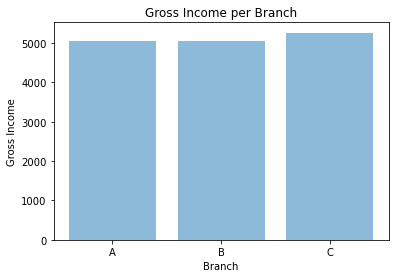

In [28]:
# Plot 1
# Gross Income per Branch
x_axis = ('A', 'B', 'C')
y_axis = data1['gross income']

plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xlabel('Branch')
plt.ylabel('Gross Income')
plt.title('Gross Income per Branch')

plt.show()

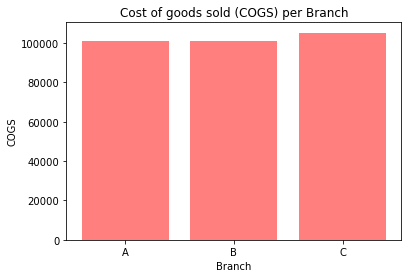

In [29]:
# Plot 2
# Cost of goods sold per Branch

x_axis = ('A', 'B', 'C')
y_axis = data1['cogs']

plt.bar(x_axis, y_axis, align='center', alpha=0.5, color='red')
plt.xlabel('Branch')
plt.ylabel('COGS')
plt.title('Cost of goods sold (COGS) per Branch')

plt.show()

## Look at the gross income in each store

In [30]:
gross_income_branch_a = df['gross income'].loc[df['Branch'] == 'A']
gross_income_branch_a.head()

0    26.1415
2    16.2155
3    23.2880
4    30.2085
6    20.6520
Name: gross income, dtype: float64

In [31]:
# set the data
gi_date = df.groupby(['Date', 'Branch']).agg({'gross income': sum}).reset_index()
gi_date.head()

,Date,Branch,gross income
0,2019-01-01,A,112.9200
1,2019-01-01,B,73.1760
2,2019-01-01,C,39.8650
3,2019-01-02,A,14.6215
4,2019-01-02,B,55.3715


In [32]:
# make the month column
gi_date['month'] = pd.DatetimeIndex(gi_date['Date']).month
gi_date.tail()

,Date,Branch,gross income,month
258,2019-03-29,B,98.0920,3
259,2019-03-29,C,46.9380,3
260,2019-03-30,A,62.8865,3
261,2019-03-30,B,82.1170,3
262,2019-03-30,C,68.6660,3


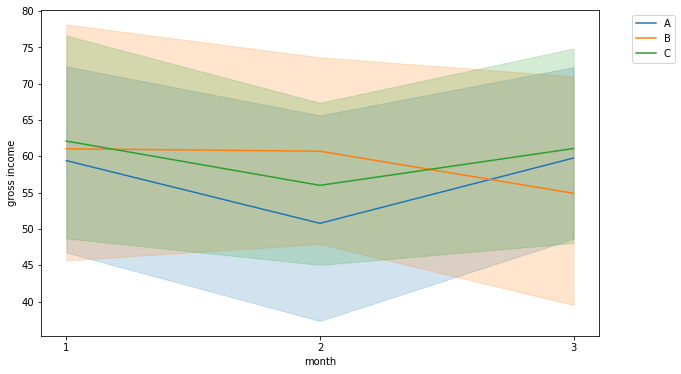

In [33]:
# Gross income Jan-March in Each Store

# plot with seaborn and use the hue parameter

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='gross income', data=gi_date, hue='Branch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

x_ticks = np.arange(1, 4, 1)
plt.xticks(x_ticks)

plt.show()

In [34]:
nana = gi_date[gi_date['Branch'] == 'A'][['month', 'gross income']]
nana.head()

,month,gross income
0,1,112.9200
3,1,14.6215
6,1,44.6385
9,1,23.0125
12,1,96.4050


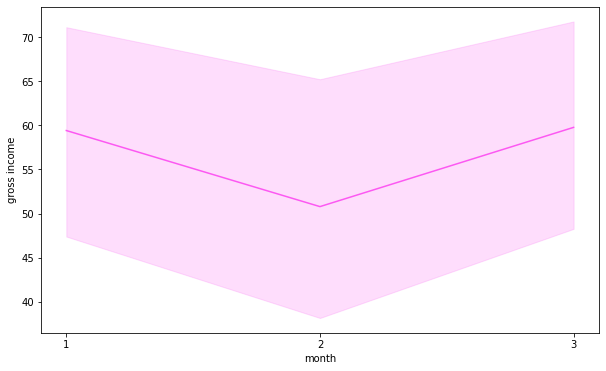

In [35]:
# plot with seaborn and use the hue parameter
# we want to make example using selection class, 
# For example we only want to have A branch

selection_class = ['A', 'B']
plt.figure(figsize=(10, 6))

sns.lineplot(x='month', y='gross income', data=nana, color='#fc58f2')

x_ticks = np.arange(1, 4, 1)
plt.xticks(x_ticks)
plt.show()

## Branch Rating

In [36]:
# Rata-rata gross margin percentage dan rating di tiap branch
rating = df.groupby(['Branch'])[['Rating']].mean()
rating 

,Rating
Branch,
A,7.027059
B,6.818072
C,7.072866


## Average Gross Margin Percentage and Rating in each Branch

In [62]:
# Data for mean of gross margin percentage in each store
gmp_mean_rating = df.groupby(['Branch']).agg({'gross margin percentage': 'mean', 'Rating': 'mean'}).reset_index()

gmp_mean_rating

,Branch,gross margin percentage,Rating
0,A,4.761905,7.027059
1,B,4.761905,6.818072
2,C,4.761905,7.072866


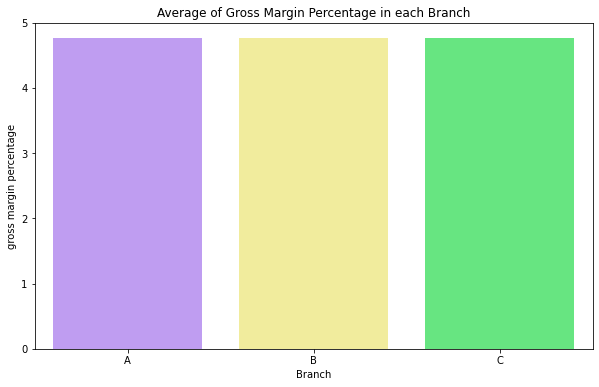

In [70]:
# Average of Gross Margin Percentage in each Branch
plt.figure(figsize=(10, 6))
sns.color_palette("hls", 8)

sns.barplot(x='Branch', y='gross margin percentage', data=gmp_mean_rating, palette=['#bc8fff', '#fff88f', '#52fa74'])

plt.title('Average of Gross Margin Percentage in each Branch')
plt.show()


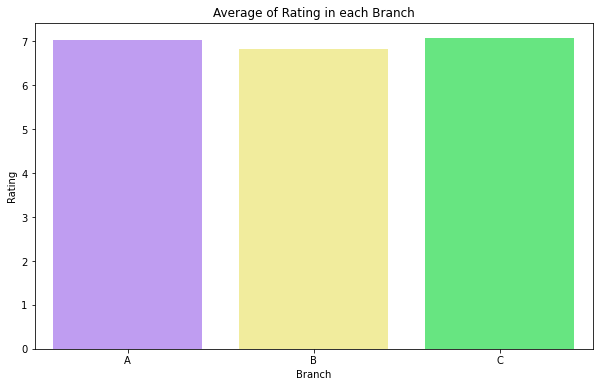

In [71]:
# Average of Rating in each Branch
plt.figure(figsize=(10, 6))
sns.color_palette("hls", 8)

sns.barplot(x='Branch', y='Rating', data=gmp_mean_rating, palette=['#bc8fff', '#fff88f', '#52fa74'])

plt.title('Average of Rating in each Branch')
plt.show()


# Buyer Behaviour Characteristics

## How many product they buy by gender

In [37]:
# total quantity pembelian di tiap gender per roduct line
data2 = df.groupby(['Gender', 'Product line'])[['Quantity']].sum()
data2 
    

Quantity
Gender Product line                    
Female Electronic accessories       488
       Fashion accessories          530
       Food and beverages           514
       Health and beauty            343
       Home and lifestyle           498
       Sports and travel            496
Male   Electronic accessories       483
       Fashion accessories          372
       Food and beverages           438
       Health and beauty            511
       Home and lifestyle           413
       Sports and travel            424

In [38]:
# convert 2d array to 1d array, Male
male_qty = data2.loc['Male'].values

# male_qty.shape #2d array
male_qty_1d = male_qty.flatten()
male_qty_1d.shape

(6,)

In [39]:
# convert 2d array to 1d array, Female
female_qty = data2.loc['Female'].values

# female_qty.shape #2d array
female_qty_1d = female_qty.flatten()
female_qty_1d.shape

(6,)

<Figure size 432x288 with 0 Axes>

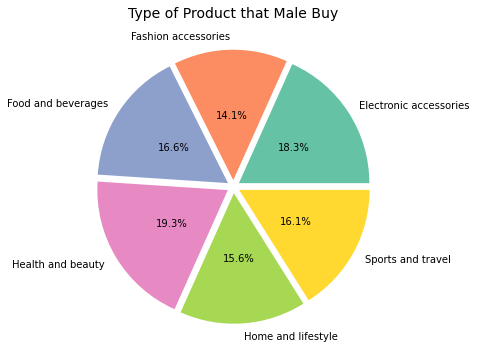

<Figure size 432x288 with 0 Axes>

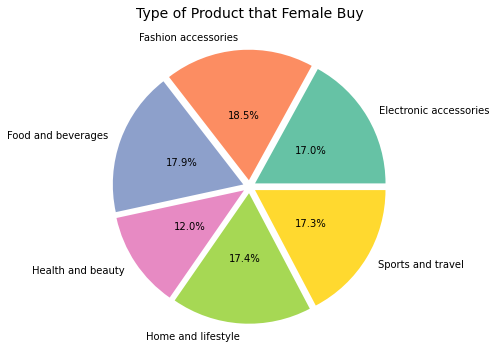

In [88]:
#Using matplotlib
plt.clf()
# pie, ax = plt.subplots(figsize=[10,6])

# create a figure with two subplots
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout() 

colors = sns.color_palette('Set2')[0:7]

labels = data2.loc['Male'].index

# Male
plt.figure(0)
plt.figure(figsize=(10, 6))
plt.pie(x=male_qty_1d, 
        autopct="%.1f%%", 
        explode=[0.05]*6, 
        labels=labels, 
        colors = colors,
        pctdistance=0.5)
plt.title("Type of Product that Male Buy", fontsize=14)

# Female
plt.figure(1)
plt.figure(figsize=(10, 6))
plt.pie(x=female_qty_1d, 
        autopct="%.1f%%", 
        explode=[0.05]*6, 
        colors = colors,
        labels=labels, 
        pctdistance=0.5)
plt.title("Type of Product that Female Buy", fontsize=14)


plt.show() #show all figures


## Who spend the most money? male or female

In [41]:
# total harga pembelian di tiap gender per roduct line
data3 = df.groupby(['Gender'])[['Total']].sum()
data3 

,Total
Gender,
Female,167882.925
Male,155083.824


In [42]:
# convert 2d array to 1d array
gender_total = data3.values

# gender_total.shape #2d array

gender_total_1d = gender_total.flatten()
gender_total_1d.shape

(2,)

<Figure size 432x288 with 0 Axes>

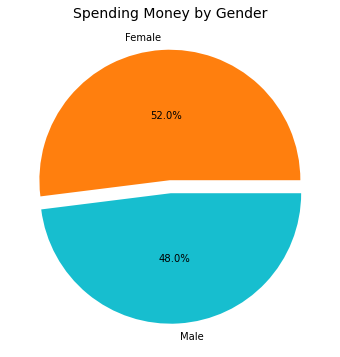

In [43]:
#Using matplotlib
plt.clf()
pie, ax = plt.subplots(figsize=[10,6])

colors = ['tab:orange', 'tab:cyan']
labels = data3.index

plt.pie(x=gender_total_1d, 
        autopct="%.1f%%", 
        explode=[0.05]*2, 
        labels=labels,
        colors = colors,
        pctdistance=0.5)

plt.title("Spending Money by Gender", fontsize=14);

## When the buyer most buy in the supermarket?

In [44]:
# Purchase time in hour
hour = df['Time'].astype(str).str[:2]
id = df['Invoice ID']
hours = pd.DataFrame(hour)
hours.head()

,Time
0,13
1,10
2,13
3,20
4,10


In [45]:
gender = df[['Invoice ID', 'Gender']]
gender.head()

,Invoice ID,Gender
0,750-67-8428,Female
1,226-31-3081,Female
2,631-41-3108,Male
3,123-19-1176,Male
4,373-73-7910,Male


In [46]:
data_gender_time = pd.concat([gender, hours], axis=1)

data_gender_time.head()

data_gender_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Invoice ID  1000 non-null   object
 1   Gender      1000 non-null   object
 2   Time        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [47]:
# Data For male
male = data_gender_time[data_gender_time['Gender'] == 'Male']
time_male_count = male.Time.value_counts().sort_index()
print(time_male_count)

10    39
11    43
12    43
13    42
14    44
15    60
16    41
17    36
18    48
19    59
20    44
Name: Time, dtype: int64


In [48]:
# Data For Female
female = data_gender_time[data_gender_time['Gender'] == 'Female']
time_female_count = female.Time.value_counts().sort_index()
print(time_female_count)

10    62
11    47
12    46
13    61
14    39
15    42
16    36
17    38
18    45
19    54
20    31
Name: Time, dtype: int64


<Figure size 432x288 with 0 Axes>

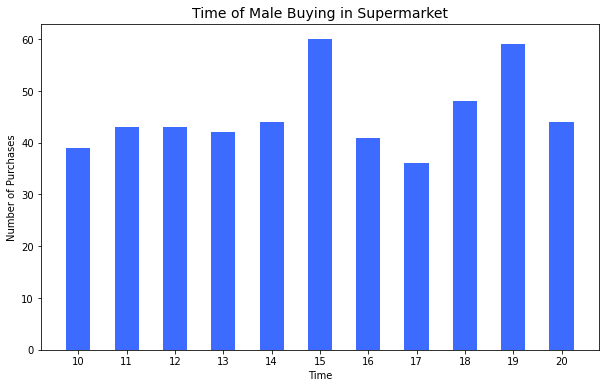

<Figure size 432x288 with 0 Axes>

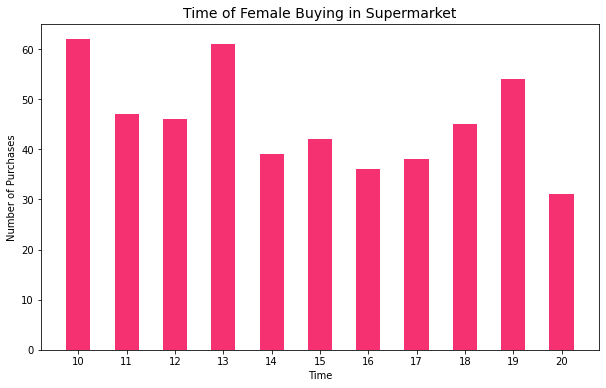

In [90]:
#Using matplotlib
plt.clf()

colors_male = sns.color_palette('pastel')[0:1]
colors_female = sns.color_palette('pastel')[1:2]

# Male
plt.figure(0)
plt.figure(figsize=(10, 6))
x_male = time_male_count.index
y_male = time_male_count.values
plt.bar(x=x_male,
        height=y_male,
        width=0.5,
       color='#3d6aff')
plt.xlabel("Time")
plt.ylabel("Number of Purchases")
plt.title("Time of Male Buying in Supermarket", fontsize=14)

# Female
plt.figure(1)
plt.figure(figsize=(10, 6))
x_female = time_female_count.index
y_female = time_female_count.values
plt.bar(x=x_female,
        height=y_female,
        width=0.5,
       color='#f53172')
plt.xlabel("Time")
plt.ylabel("Number of Purchases")
plt.title("Time of Female Buying in Supermarket", fontsize=14)


plt.show() #show all figures


## What kind of Payment Buyer Use, Based on Gender

In [72]:
# total quantity pembelian di tiap gender per roduct line
payment_gender = df.groupby(['Gender', 'Payment'])[['Invoice ID']].count()
payment_gender
    

Invoice ID
Gender Payment                
Female Cash                178
       Credit card         163
       Ewallet             160
Male   Cash                166
       Credit card         148
       Ewallet             185

In [81]:
# convert 2d array to 1d array, Male
male_payment = payment_gender.loc['Male'].values

# male_payment.shape #2d array

male_payment_1d = male_payment.flatten()
male_payment_1d

array([166, 148, 185], dtype=int64)

In [82]:
# convert 2d array to 1d array, Female
female_payment = payment_gender.loc['Female'].values

# female_qty.shape #2d array
female_payment_1d = female_payment.flatten()
female_payment_1d.shape

(3,)

<Figure size 432x288 with 0 Axes>

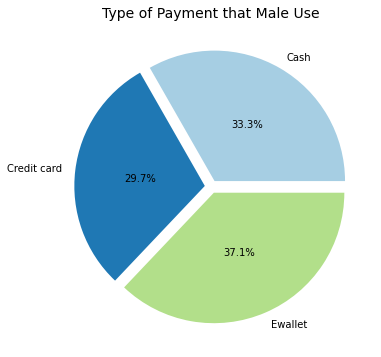

<Figure size 432x288 with 0 Axes>

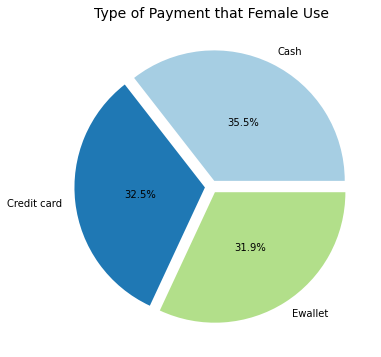

In [83]:
#Using matplotlib
plt.clf()

colors_payment = sns.color_palette('Paired')[0:3]

labels_payment = payment_gender.loc['Male'].index

# Male
plt.figure(0)
plt.figure(figsize=(10, 6))
plt.pie(x=male_payment_1d, 
        autopct="%.1f%%", 
        explode=[0.05]*3, 
        labels=labels_payment, 
        colors = colors_payment,
        pctdistance=0.5)
plt.title("Type of Payment that Male Use", fontsize=14)

# Female
plt.figure(1)
plt.figure(figsize=(10, 6))
plt.pie(x=female_payment_1d, 
        autopct="%.1f%%", 
        explode=[0.05]*3, 
        colors = colors_payment,
        labels=labels_payment, 
        pctdistance=0.5)
plt.title("Type of Payment that Female Use", fontsize=14)


plt.show() #show all figures
